In [1]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
import pandas as pd

data = pd.read_csv('apple_data.csv')
data.head()


,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
1,2015-01-05,23.604326,24.137507,23.417714,24.057530,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937576,24.037547,23.704309,23.815388,160423600
4,2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2515 non-null   object 
 1   Close   2515 non-null   float64
 2   High    2515 non-null   float64
 3   Low     2515 non-null   float64
 4   Open    2515 non-null   float64
 5   Volume  2515 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.0+ KB


In [4]:
close_data = data['Close'].dropna()

In [5]:
train_size = int(len(close_data) * 0.8)
train, test = close_data[:train_size], close_data[train_size:]

### Arima Model Training

In [6]:
# We can also try ARIMA(1,1,2)
model_arima = ARIMA(train, order=(1, 1, 1))
arima_result = model_arima.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2012
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3960.265
Date:                Sat, 12 Jul 2025   AIC                           7926.531
Time:                        17:34:11   BIC                           7943.350
Sample:                             0   HQIC                          7932.705
                               - 2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3962      0.167      2.379      0.017       0.070       0.723
ma.L1         -0.4545      0.163     -2.787      0.005      -0.774      -0.135
sigma2         3.0063      0.045     67.030      0.000       2.918       3.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4438.68
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              49.74   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
forecast_arima = arima_result.forecast(steps=len(test))
mse_arima = mean_squared_error(test, forecast_arima)
print(f"ARIMA MSE: {mse_arima:}")

ARIMA MSE: 4812.624323058252


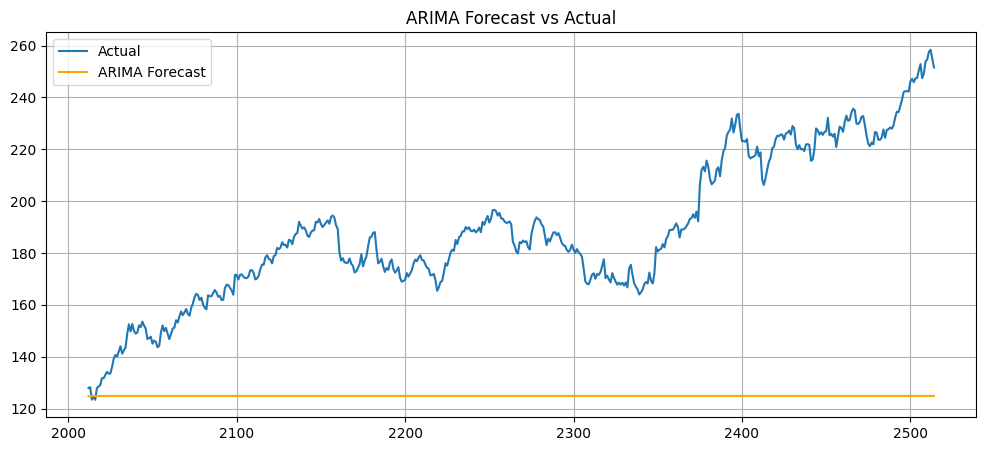

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()

### Train Sarima

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: SARIMA(1,1,1)(1,1,1,12) → assuming monthly seasonality
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model_sarima.fit()
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2012
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3967.622
Date:                            Thu, 26 Jun 2025   AIC                           7945.245
Time:                                    00:46:01   BIC                           7973.247
Sample:                                         0   HQIC                          7955.527
                                           - 2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4165      0.167      2.491      0.013       0.089       0.744
ma.L1         -0.4735      0.163   

In [11]:
forecast_sarima = sarima_result.forecast(steps=len(test))
mse_sarima = mean_squared_error(test, forecast_sarima)
print(f"SARIMA MSE: {mse_sarima:}")


SARIMA MSE: 3043.697678635956


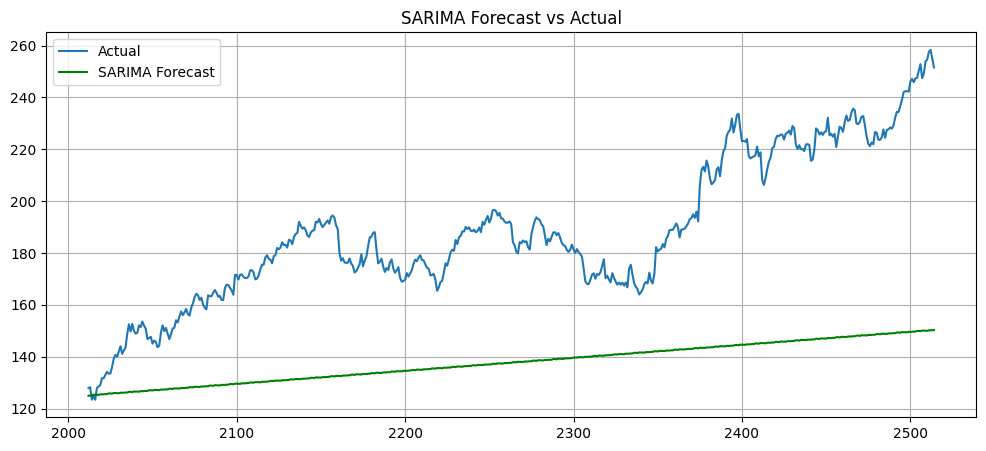

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()